![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


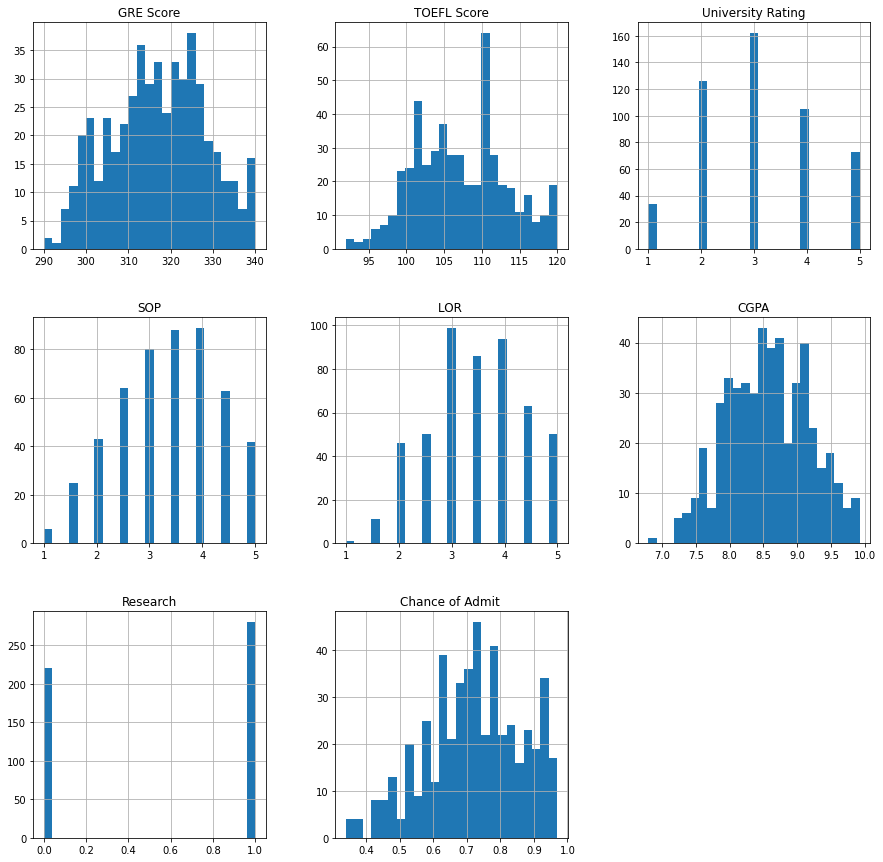

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [13]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [14]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

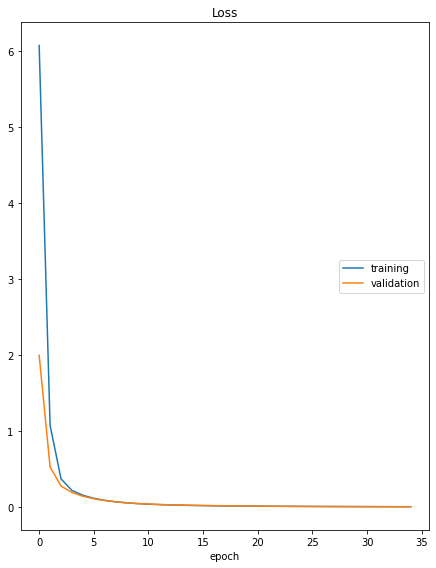

Loss
	training         	 (min:    0.007, max:    6.074, cur:    0.007)
	validation       	 (min:    0.007, max:    1.999, cur:    0.007)
11/11 [==============================] - 0s 19ms/step - loss: 0.0068 - val_loss: 0.0070
Mean Absolute Error: 0.06478942983150482
Mean Squared Error: 0.007042643344654651


In [22]:
# Celda 1
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
Y_train = yTrain
Y_test = yTest

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)


from keras import backend as K
# Definición de dimensiones de salida, variables de interés
output_var = 1
print(output_var, ' output variables')
# Definición de dimensiones de entrada, variables predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 35 épocas
from livelossplot import PlotLossesKeras
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=35, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(Y_test, model.predict(X_test)))
print('Mean Squared Error:', mean_squared_error(Y_test, model.predict(X_test)))

Dado que es un modelo de regresión, hemos decidido utilizar como función de perdida la función de error **mean squared error**. Como optimizador seleccionamos el algoritmo de gradiente descendente estocástico (SGD). Y en cuanto al número de épocas, pudimos notar que el modelo se convergía a una precisión muy buena a partir de la época 35 por lo que a manera de parada temprana seleccionamos una época de 35.

Obtuvimos un Mean Absolute Error (MAE) de 0.06478942983150482, y un Mean Squared Error (MSE) de 0.007042643344654651.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

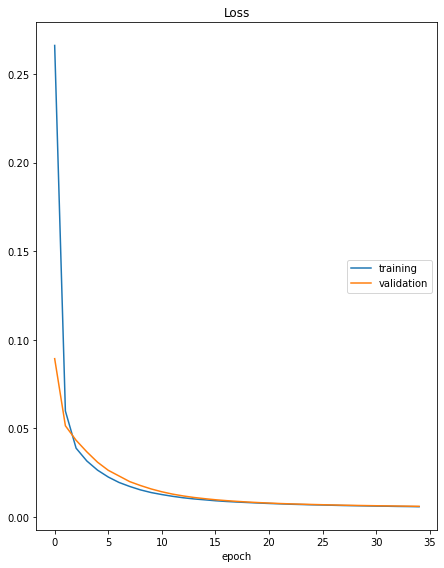

Loss
	training         	 (min:    0.006, max:    0.266, cur:    0.006)
	validation       	 (min:    0.006, max:    0.089, cur:    0.006)
11/11 [==============================] - 0s 20ms/step - loss: 0.0058 - val_loss: 0.0061
Mean Absolute Error: 0.06280697952111564
Mean Squared Error: 0.006066684551591241


In [24]:
# Celda 2
K.clear_session()
from keras.layers import Dense, Activation

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 35 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=35, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

print('Mean Absolute Error:', mean_absolute_error(Y_test, model.predict(X_test)))
print('Mean Squared Error:', mean_squared_error(Y_test, model.predict(X_test)))

Para este caso multicapa usamos el mismo optimizador, la misma función de costo y el mismo número de épocas (Dado que el comportamiento era similar en la mejora de la función de costo). Por lo que obtuvimos un Mean Absolute Error (MAE) de 0.06280697952111564, y un Mean Squared Error (MSE) de 0.006066684551591241 que es una mejora global respecto al modelo de una capa.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

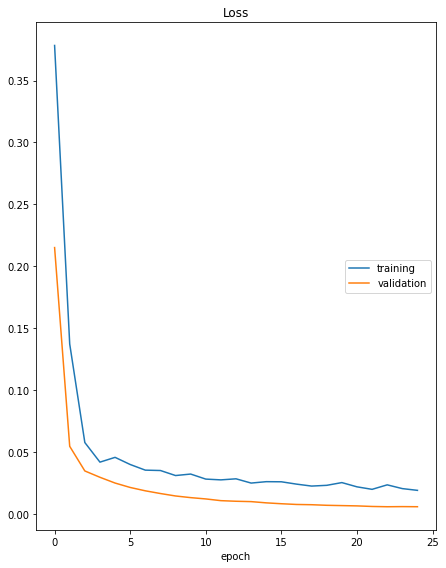

Loss
	training         	 (min:    0.019, max:    0.378, cur:    0.019)
	validation       	 (min:    0.006, max:    0.215, cur:    0.006)
11/11 [==============================] - 0s 22ms/step - loss: 0.0191 - val_loss: 0.0059
Epoch 25: early stopping
Mean Absolute Error: 0.06028573434352874
Mean Squared Error: 0.0059047669847852756


In [26]:
# Celda 3
K.clear_session()
from keras.layers import Dense, Activation

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de la función EarlyStopping para considerar durante el entrenamiento
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 100 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras(),best_model, early_stop])

print('Mean Absolute Error:', mean_absolute_error(Y_test, model.predict(X_test)))
print('Mean Squared Error:', mean_squared_error(Y_test, model.predict(X_test)))

En este caso multicapa usamos el mismo optimizador, la misma función de costo y el número de épocas lo pasamos a 100 dado que contamos con early stopping. Agregamos dropout para evitar overfitting en las dos capas ocultas con un valor de 0.2. Finalmente obtuvimos un Mean Absolute Error (MAE) de 0.06028573434352874, y un Mean Squared Error (MSE) de 0.0059047669847852756 que es una mejora global respecto a los dos modelos anteriores.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 4
# En la comparación de los tres modelos pudimos notar la mejora que produjo agregar capas hacsta cierto limite
# sin perjudicar la complejidad de la red.
# Tambien vimos el efecto de la función Dropout y del early stopping para optimizar el entrenamiento.